In [2]:
'''
Descripttion: numpy广播实现kmeans
version: 1.0
Author: SongJ
Date: 2021-09-10 08:59:12
LastEditors: SongJ
LastEditTime: 2021-09-12 22:24:28
'''

import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def L2distance(x,k):
    # 使用L2范数计算向量距离
    x = np.array([0.697,0.460])
    k = np.array([0.403,0.237])
    minus = x-k # 求差
    absminus = np.maximum(minus,-minus) # 求绝对值
    return np.sum(np.dot(absminus,absminus))**0.5

In [4]:
def kmeans(data,k,epochs):
    # 利用广播计算距离加快计算
    n, m=data.shape # 样本数量 , 维度
    ini = np.random.choice(np.arange(n), size=k, replace = False) # 随机选取聚类中心的向量index
    midpoint = data[ini] # 根据索引获取中心向量 shape(k,m)
    last_label = 0
    while(epochs):
        d = np.expand_dims(data,axis=0).repeat(k,axis=0) # shape(k*n*m)
        mid_ = np.expand_dims(midpoint,axis=1).repeat(n,axis=1) # shape(k*n*m)
        dis = (np.sum((d - mid_)**2,2))**0.5 # L2范数计算距离(欧式距离)，最内侧的维度求和会降维 shape(k,n)
        labels = dis.argmin(0) # 根据距离最近的划分簇
        if np.sum(labels != last_label) == 0 : # 如果标签不在变化，则直接返回
            return labels
        last_label=labels
        for i in range(k):
            # 更新聚类中心
            kpoint = data[labels == i] # 挑选每一个标签的数据 
            if i == 0:
                midpoint = np.expand_dims(kpoint.mean(0),0)  # 如果i是0说明是x重新生成新的
            else:
                midpoint = np.concatenate([midpoint, np.expand_dims(kpoint.mean(0),0)],0)
        epochs -= 1
    return labels


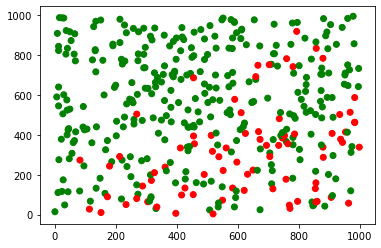

In [9]:
data1 = np.random.randint(1,1000,(200,5))
data2 = np.random.randint(1,1000,(200,5))
data = np.concatenate([data1, data2],0)
t = np.expand_dims(kmeans(data,5,100),1)
color = list(t)
color = [(lambda x: 'r' if x==0 else 'g')(i) for i in color]
plt.scatter(data[:,0], data[:,1], color = color)
plt.show()

In [6]:
x = np.array([0.697,0.460])
k = np.array([[0.403,0.237],[0.343,0.099],[0.478,0.437]])
# x = torch.from_numpy(x)
# k = torch.from_numpy(k)
# dis = torch.sum((k-x)**2,1)
dis = np.sum((k-x)**2,1)**0.5
dis.argmin(0)
dis

array([0.36900542, 0.50560558, 0.22020445])

In [160]:
a= torch.from_numpy(x1)

In [161]:
a = np.array(a)

In [162]:
a

array([[2, 4, 1],
       [1, 4, 4],
       [2, 2, 4],
       [3, 1, 4],
       [4, 2, 2]])

In [163]:
ini = np.random.randint(1,(5,))

In [164]:
x1 =np.random.randint(1,5,[5,3])

In [165]:
ini = np.random.choice(np.arange(5),size =3, replace = False)
midpoint = x1[ini]

In [166]:
midpoint

array([[2, 4, 4],
       [2, 4, 1],
       [3, 1, 2]])

In [167]:
np.expand_dims(x1,axis=0)

array([[[2, 4, 4],
        [3, 4, 3],
        [3, 1, 2],
        [3, 1, 1],
        [2, 4, 1]]])

In [168]:
x1

array([[2, 4, 4],
       [3, 4, 3],
       [3, 1, 2],
       [3, 1, 1],
       [2, 4, 1]])

In [169]:
x2 = torch.from_numpy(x1)
x2.unsqueeze(0).repeat(3,1,1)

tensor([[[2, 4, 4],
         [3, 4, 3],
         [3, 1, 2],
         [3, 1, 1],
         [2, 4, 1]],

        [[2, 4, 4],
         [3, 4, 3],
         [3, 1, 2],
         [3, 1, 1],
         [2, 4, 1]],

        [[2, 4, 4],
         [3, 4, 3],
         [3, 1, 2],
         [3, 1, 1],
         [2, 4, 1]]])

In [170]:
np.expand_dims(x1,axis=0).repeat(3,axis=0)

array([[[2, 4, 4],
        [3, 4, 3],
        [3, 1, 2],
        [3, 1, 1],
        [2, 4, 1]],

       [[2, 4, 4],
        [3, 4, 3],
        [3, 1, 2],
        [3, 1, 1],
        [2, 4, 1]],

       [[2, 4, 4],
        [3, 4, 3],
        [3, 1, 2],
        [3, 1, 1],
        [2, 4, 1]]])

In [171]:
midpoint


array([[2, 4, 4],
       [2, 4, 1],
       [3, 1, 2]])

In [196]:
mid_ = np.expand_dims(midpoint,axis=1).repeat(5,axis=1) # shape(k*n*m)
d = np.expand_dims(x1,axis=0).repeat(3,axis=0) # shape(k*n*m)

In [205]:
mid_

array([[[2, 4, 4],
        [2, 4, 4],
        [2, 4, 4],
        [2, 4, 4],
        [2, 4, 4]],

       [[2, 4, 1],
        [2, 4, 1],
        [2, 4, 1],
        [2, 4, 1],
        [2, 4, 1]],

       [[3, 1, 2],
        [3, 1, 2],
        [3, 1, 2],
        [3, 1, 2],
        [3, 1, 2]]])

In [206]:
d

array([[[2, 4, 4],
        [3, 4, 3],
        [3, 1, 2],
        [3, 1, 1],
        [2, 4, 1]],

       [[2, 4, 4],
        [3, 4, 3],
        [3, 1, 2],
        [3, 1, 1],
        [2, 4, 1]],

       [[2, 4, 4],
        [3, 4, 3],
        [3, 1, 2],
        [3, 1, 1],
        [2, 4, 1]]])

In [199]:
(d-mid_)**2

array([[[0, 0, 0],
        [1, 0, 1],
        [1, 9, 4],
        [1, 9, 9],
        [0, 0, 9]],

       [[0, 0, 9],
        [1, 0, 4],
        [1, 9, 1],
        [1, 9, 0],
        [0, 0, 0]],

       [[1, 9, 4],
        [0, 9, 1],
        [0, 0, 0],
        [0, 0, 1],
        [1, 9, 1]]])

In [210]:
np.sum((d-mid_)**2,2)

array([[ 0,  2, 14, 19,  9],
       [ 9,  5, 11, 10,  0],
       [14, 10,  0,  1, 11]])

In [257]:
labels = ((np.sum((d-mid_)**2,2))**0.5).argmin(0)
labels

array([0, 0, 2, 2, 1])

In [265]:
kpoint=x1[labels == 2]
kpoint.mean(0)

array([3. , 1. , 1.5])

In [262]:
midpoint = np.expand_dims(kpoint.mean(0),0)

In [263]:
midpoint

array([[3. , 1. , 1.5]])

In [253]:
x1

array([[2, 4, 4],
       [3, 4, 3],
       [3, 1, 2],
       [3, 1, 1],
       [2, 4, 1]])

In [1]:
import torch
a = torch.tensor([2,3])
b = torch.tensor([3,2])

In [3]:
torch.max(a,b)

tensor([3, 3])